### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
#ENTORNO DE DESPLIEGUE CON ANACONDA

# conda create -n tf tensorflow 
# conda activate tf
# conda install -c anaconda pandas-datareader
# conda env list //para ver entornos y ver cual esta activo
# conda install -n tf ipykernel --update-deps --force-reinstall
# conda install -c anaconda pandas
# conda install -c anaconda scikit-learn
# conda install -c conda-forge matplotlib

# conda list //ver paquetes instalados en entorno
# conda remove keras //eliminar paquete del entorno
# pip uninstall keras //si fue instalado con pip y no desde anaconda

 

In [5]:
#LIBRERIAS

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.model_selection import TimeSeriesSplit

#print(tf.__version__)

In [3]:
# LEEMOS CADA UNO DE LOS FICHEROS GENERADOS

#Vamos a trabajar con 1/3 de los valores para mayor agilidad. En el futuro trabajaremos con todas las empresas
#dfsymbols = pd.read_csv('symbols_Nasdaq100_all.txt', sep = ' ', header=None)
dfsymbols = pd.read_csv('symbols_Nasdaq100_1.txt', sep = ' ', header=None)

dfnasdaq = []

for i in range(len(dfsymbols)):  
    company = str(dfsymbols[0][i]) 
    dfcompany = pd.read_csv(f"files/{company}.csv")
    #print(dfcompany)
    dfnasdaq.append(dfcompany)
        

In [4]:
# Tomamos datos de amazon para pruebas con el modelo.
df = dfnasdaq[10]
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AMZN,2017-04-06 00:00:00+00:00,898.28,917.1899,894.4927,913.800,6344065,898.28,917.1899,894.4927,913.800,6344065,0.0,1.0
1,AMZN,2017-04-07 00:00:00+00:00,894.88,900.0900,889.3100,899.650,3707367,894.88,900.0900,889.3100,899.650,3707367,0.0,1.0
2,AMZN,2017-04-10 00:00:00+00:00,907.04,908.5100,899.0000,899.630,3184301,907.04,908.5100,899.0000,899.630,3184301,0.0,1.0
3,AMZN,2017-04-11 00:00:00+00:00,902.36,911.2400,897.5000,907.040,3012743,902.36,911.2400,897.5000,907.040,3012743,0.0,1.0
4,AMZN,2017-04-12 00:00:00+00:00,896.23,904.0900,895.2501,903.090,2456140,896.23,904.0900,895.2501,903.090,2456140,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,AMZN,2022-03-29 00:00:00+00:00,3386.30,3416.6300,3357.3700,3407.680,3307680,3386.30,3416.6300,3357.3700,3407.680,3307680,0.0,1.0
1254,AMZN,2022-03-30 00:00:00+00:00,3326.02,3379.0100,3310.0000,3370.190,2808363,3326.02,3379.0100,3310.0000,3370.190,2808363,0.0,1.0
1255,AMZN,2022-03-31 00:00:00+00:00,3259.95,3329.9000,3259.0700,3328.895,2998289,3259.95,3329.9000,3259.0700,3328.895,2998289,0.0,1.0
1256,AMZN,2022-04-01 00:00:00+00:00,3271.20,3316.5400,3246.3900,3282.990,2854475,3271.20,3316.5400,3246.3900,3282.990,2854475,0.0,1.0


Text(0, 0.5, 'Price')

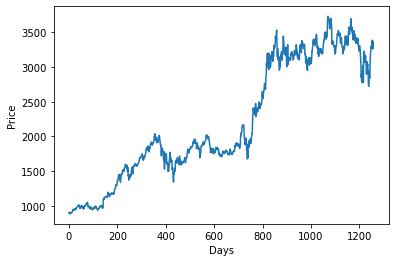

In [5]:
# PREPROCESAMIENTO DE LOS DATOS
# Descartamos todas las columnas y nos quedamos unicamente con el precio de cierre de la acción
df1=df.reset_index()['close']
#print(df1)
plt.plot(df1)
plt.xlabel('Days')
plt.ylabel('Price')

In [18]:
# PREPROCESAMIENTO DE LOS DATOS

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.00478091]
 [0.00358656]
 [0.00785811]
 ...
 [0.834386  ]
 [0.83833789]
 [0.87196583]]


In [54]:
#Time Series Split es una manera de hacer crossvalidation con series temporales. Vamos a aplicarlo al cjto de datos de entrenamiento
X = np.random.randn(12, 2) 
y = np.random.randint(0, 2, 12)
print(X)
tscv = TimeSeriesSplit(n_splits=3, test_size=1)
for train_index, test_index in tscv.split(X):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]

TRAIN: [0 1 2 3 4 5 6 7 8] TEST: [9]
TRAIN: [0 1 2 3 4 5 6 7 8 9] TEST: [10]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10] TEST: [11]


In [56]:
print(X_train.shape)
print(y_train.shape)

(11, 2)
(11,)


In [ ]:
tscv = TimeSeriesSplit(n_splits=3, test_size=2)
for train_index, test_index in tscv.split(X):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]

In [17]:
# PREPARACIÓN DE DATOS DE TEST Y TRAIN

# Disponemos de aprox 1250 días de información. Queremos dejar el último mes para test.
# Fijaremos como datos de entrenamiento el 97.5% del los datos disponibles

training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size

train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

print(f"El total de datos es {len(df1)}")
print(f"Nº datos entrenamiento = {training_size}")
print(f"Nº datos test = {test_size}")
print(np.shape(train_data))
print(np.shape(test_data))

El total de datos es 1258
Nº datos entrenamiento = 817
Nº datos test = 441
(817, 1)
(441, 1)


In [8]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [12]:
# fix random seed for reproducibility
np.random.seed(7)

In [13]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
look_back = 100
X_train, y_train = create_dataset(train_data, look_back)
X_test, ytest = create_dataset(test_data, look_back)

In [14]:
print(X_train.shape), print(y_train.shape)



(716, 100)
(716,)


(None, None)

In [43]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [26]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [27]:
### Create the Stacked LSTM model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
12/12 [==============================] - 3s 242ms/step - loss: 0.0091 - val_loss: 0.1100
Epoch 2/10
12/12 [==============================] - 2s 147ms/step - loss: 0.0047 - val_loss: 0.0363
Epoch 3/10
12/12 [==============================] - 2s 143ms/step - loss: 0.0024 - val_loss: 0.0042
Epoch 4/10
12/12 [==============================] - 2s 148ms/step - loss: 0.0014 - val_loss: 0.0038
Epoch 5/10
12/12 [==============================] - 2s 148ms/step - loss: 0.0011 - val_loss: 0.0065
Epoch 6/10
12/12 [==============================] - 2s 144ms/step - loss: 0.0011 - val_loss: 0.0035
Epoch 7/10
12/12 [==============================] - 2s 144ms/step - loss: 0.0011 - val_loss: 0.0041
Epoch 8/10
12/12 [==============================] - 2s 144ms/step - loss: 0.0010 - val_loss: 0.0038
Epoch 9/10
12/12 [==============================] - 2s 145ms/step - loss: 9.6802e-04 - val_loss: 0.0122
Epoch 10/10
12/12 [==============================] - 2s 145ms/step - loss: 9.8432e-04 - val_loss

# REFERENCIA DE RENDIMIENTO
# Con tensorflow funcionando unicamente sobre CPU en entrenar 100 EPOCHS (con bateria) ha tardado 2m 43s

# Tarea: instalar en el entorno de anaconda soporte para GPU y probar mejora de rendimiento

In [31]:
# Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [32]:
# Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [33]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1746.718691851613

In [34]:
# Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

3481.37734072414

In [35]:
ytestreversed = scaler.inverse_transform(ytest.reshape(-1,1))
ytestreversed[-5:]



array([[3379.81],
       [3386.3 ],
       [3326.02],
       [3259.95],
       [3271.2 ]])

In [36]:

test_predict[-5:]

array([[3169.428 ],
       [3202.847 ],
       [3238.529 ],
       [3274.6824],
       [3309.1555]], dtype=float32)

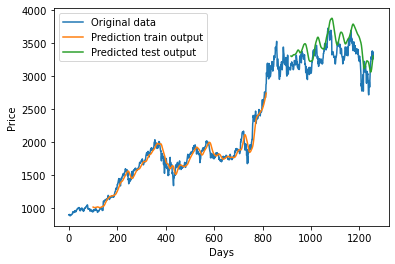

In [37]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Original data', 'Prediction train output', 'Predicted test output' ])
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

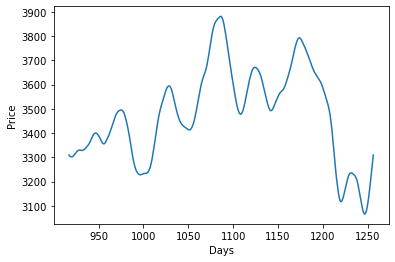

In [38]:
plt.plot(testPredictPlot)
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()